<H1> Earthquakes in Central America (1965 - 2016)

<h2> Exploring the data

<h4> Importing data to watson studio

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5e257c6d7253436b8386d986dead5ac0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DKOtXM__d0h6An57FFBHSYN-eLWx4u-F8-ae86bpy5mW',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_5e257c6d7253436b8386d986dead5ac0.get_object(Bucket='earthquakesincentralamerica-donotdelete-pr-iatp1hrw6qx63l',Key='database.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_eq1 = pd.read_csv(body)
df_eq1.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [2]:
df_eq1.shape

(23412, 21)

In [3]:
df_eq1.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


<h4> Looking for missing or NAN values in the DF

In [4]:
df_eq1.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

<h4> Dropping columns with too many missing values

In [5]:
df_eq1 = df_eq1.drop(columns={'Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance','Horizontal Error'})

In [6]:
df_eq1.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


<h2> Cleaning Categorical Columns

<h3> Type

In [7]:
df_eq1['Type'].isnull().sum()

0

In [8]:
df_eq1['Type'].value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

<h3> Magnitude Type

In [9]:
df_eq1['Magnitude Type'].isnull().sum()

3

In [10]:
df_eq1['Magnitude Type'].value_counts()

MW     7722
MWC    5669
MB     3761
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
Name: Magnitude Type, dtype: int64

<h4> Creating a value called "other" to group values with low counts

In [11]:
df_eq1['Magnitude Type'] = df_eq1['Magnitude Type'].str.replace('MH', 'other').str.replace('MD', 'other').str.replace('MWR','other').str.replace('ML', 'other').str.replace('MS', 'other').str.replace('MWW', 'other')

<h3> Source

<h4> Looking for missing values

In [12]:
df_eq1['Source'].isnull().sum()

0

<h4> Value counts

In [13]:
df_eq1['Source'].value_counts()

US           20630
ISCGEM        2460
ISCGEMSUP      120
CI              61
GCMT            55
NC              51
AK              12
OFFICIAL         8
UW               6
NN               4
ATLAS            3
PR               1
SE               1
Name: Source, dtype: int64

<h4> Creating a value called "other" to group values with low counts

In [14]:
df_eq1['Source'] = df_eq1['Source'].str.replace('PR', 'other').str.replace('SE', 'other').str.replace('ATLAS','other').str.replace('NN', 'other').str.replace('UW', 'other').str.replace('OFFICIAL', 'other').str.replace('AK', 'other').str.replace('NC','other').str.replace('GCMT', 'other').str.replace('CI', 'other').str.replace('ISCGEMSUP', 'other')

<h3> Location Source

<h4> Looking for missing values

In [15]:
df_eq1['Location Source'].isnull().sum()

0

In [16]:
df_eq1['Location Source'].value_counts()

US        20350
ISCGEM     2581
CI           61
GCMT         56
NC           54
GUC          46
AEIC         40
UNM          21
PGC          19
WEL          18
AGS          17
ISK          15
ATH          14
AK           14
HVO          12
SPE          10
H             7
TEH           7
ROM           7
AEI           7
UW            6
CASC          4
US_WEL        4
NN            4
RSPR          3
ATLAS         3
JMA           3
THE           3
THR           3
TUL           2
G             2
B             2
MDD           2
SLC           1
UCR           1
BRK           1
SJA           1
OTT           1
SE            1
BOU           1
U             1
CAR           1
CSEM          1
LIM           1
PR            1
AG            1
BEO           1
TAP           1
Name: Location Source, dtype: int64

In [17]:
df_eq1['Location Source'] = df_eq1['Location Source'].str.replace('SE', 'other').str.replace('CAR', 'other').str.replace('U','other').str.replace('TAP', 'other').str.replace('BRK', 'other').str.replace('LIM', 'other').str.replace('CSEM', 'other').str.replace('SJA','other').str.replace('UCR', 'other').str.replace('BOU', 'other').str.replace('SLC', 'other').str.replace('OTT', 'other').str.replace('PR', 'other').str.replace('AG','other').str.replace('BEO', 'other').str.replace('MDD', 'other').str.replace('TUL', 'other').str.replace('B', 'other').str.replace('G','other').str.replace('THR', 'other').str.replace('THE', 'other').str.replace('RSPR', 'other').str.replace('ATLAS', 'other').str.replace('JMA', 'other').str.replace('NN','other').str.replace('US_WEL', 'other').str.replace('CASC', 'other').str.replace('UW', 'other').str.replace('H', 'other').str.replace('ROM','other').str.replace('AEI', 'other').str.replace('TEH', 'other').str.replace('SPE', 'other').str.replace('HVO', 'other').str.replace('ATH', 'other').str.replace('AK','other').str.replace('ISK', 'other').str.replace('AGS', 'other').str.replace('WEL', 'other').str.replace('PGC', 'other').str.replace('UNM','other').str.replace('AEIC', 'other').str.replace('GUC', 'other').str.replace('NC', 'other').str.replace('GCMT', 'other').str.replace('CI', 'other').str.replace('otherOother', 'other').str.replace('CotherM','other').str.replace('otherCR', 'other').str.replace('TotherL', 'other').str.replace('RSother', 'other').str.replace('otherS_other', 'other').str.replace('otherW','other').str.replace('TEother', 'other').str.replace('otherVO', 'other').str.replace('ATother', 'other').str.replace('PotherC', 'other').str.replace('otherNM', 'other').str.replace('otherC', 'other').str.replace('otherotherC', 'other').str.replace('otherCMT', 'other').str.replace('otherother', 'other').str.replace('otherMT', 'other').str.replace('otherS', 'other')

not sure if Location Source will be a valueble feature because most of its values fall in the category of "other"

In [18]:
df_eq1.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,NaN,ISCGEM860706,ISCGEM,ISCotherEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,NaN,ISCGEM860737,ISCGEM,ISCotherEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,NaN,ISCGEM860762,ISCGEM,ISCotherEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,NaN,ISCGEM860856,ISCGEM,ISCotherEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,NaN,ISCGEM860890,ISCGEM,ISCotherEM,ISCGEM,Automatic


<h3> Magnitude Source

In [19]:
df_eq1['Magnitude Source'].value_counts()

US          10458
HRV          8223
ISCGEM       2580
GCMT         1489
NC            533
CI             61
AK             12
PAR             9
OFFICIAL        8
UW              6
GUC             6
NIED            4
NN              4
ATLAS           3
US_GCMT         3
1000            3
BRK             2
PGC             2
US_PGC          1
1020            1
1009            1
SE              1
PR              1
1023            1
Name: Magnitude Source, dtype: int64

<h4> Creating a value called "other" to group values with low counts

In [20]:
df_eq1['Magnitude Source'] = df_eq1['Magnitude Source'].str.replace('1009', 'other').str.replace('1020', 'other').str.replace('1023','other').str.replace('SE', 'other').str.replace('PR', 'other').str.replace('US_PGC', 'other').str.replace('BRK', 'other').str.replace('PGC','other').str.replace('US_GCMT', 'other').str.replace('ATLAS', 'other').str.replace('1000', 'other').str.replace('NIED', 'other').str.replace('NN', 'other').str.replace('GUC','other').str.replace('UW', 'other').str.replace('OFFICIAL', 'other').str.replace('PAR', 'other').str.replace('AK', 'other').str.replace('CI','other').str.replace('NC', 'other').str.replace('GCMT', 'other').str.replace('ISCGEM', 'other')

<h3> Status

In [21]:
df_eq1['Status'].value_counts()

Reviewed     20773
Automatic     2639
Name: Status, dtype: int64

In [22]:
categorical_data = df_eq1[['Type','Magnitude Type','Source','Location Source', 'Magnitude Source','Status']]

<h2> Plotting categorical column's value counts

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


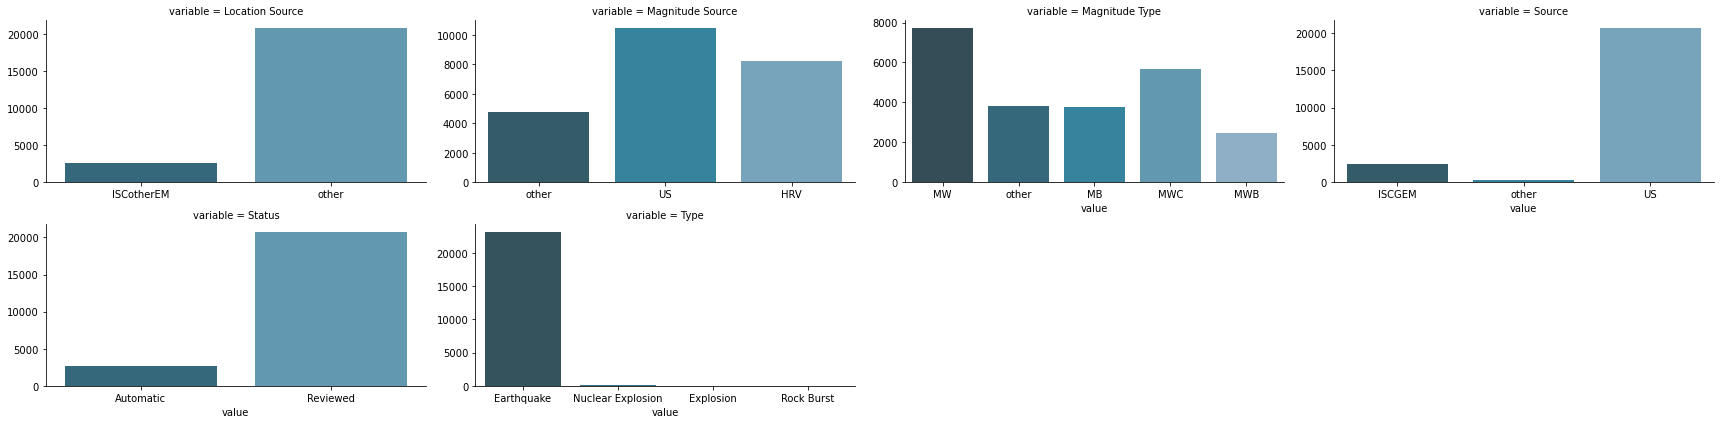

In [23]:
import seaborn as sns

f = pd.melt(df_eq1, value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False, height=3, aspect=2)
g= g.map(sns.countplot, 'value', palette='PuBuGn_d')

<h3> Missing values

In [24]:
df_eq1.isnull().sum()

Date                   0
Time                   0
Latitude               0
Longitude              0
Type                   0
Depth                  0
Magnitude              0
Magnitude Type         3
Root Mean Square    6060
ID                     0
Source                 0
Location Source        0
Magnitude Source       0
Status                 0
dtype: int64

In [25]:
df_eq1['Magnitude Type'] = df_eq1['Magnitude Type'].fillna('MW')

In [26]:
df_eq1['Root Mean Square'] = df_eq1['Root Mean Square'].fillna(df_eq1['Root Mean Square'].mean())

In [27]:
df_eq1.isnull().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
Root Mean Square    0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

<h2> Selecting only earthquakes in Central America

In [28]:
index_names = df_eq1[(df_eq1['Latitude'] >= 7) & (df_eq1['Latitude'] <= 16.5) & (df_eq1['Longitude'] <= -80) & (df_eq1['Longitude'] >= -92 )].index 

In [29]:
index_names.shape

(389,)

In [30]:
df_CA1 = df_eq1.loc[index_names]

In [31]:
df_CA1.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
141,05/03/1965,10:01:38,13.683,-89.070,Earthquake,15.0,5.9,MW,1.022784,ISCGEM856602,ISCGEM,ISCotherEM,other,Automatic
330,12/15/1965,23:05:25,7.650,-81.913,Earthquake,25.0,6.3,MW,1.022784,ISCGEM851774,ISCGEM,ISCotherEM,other,Automatic
398,03/27/1966,18:53:41,8.865,-83.467,Earthquake,25.0,5.7,MW,1.022784,ISCGEM849641,ISCGEM,ISCotherEM,other,Automatic
407,04/09/1966,02:42:09,9.409,-84.282,Earthquake,25.0,5.8,MW,1.022784,ISCGEM848237,ISCGEM,ISCotherEM,other,Automatic
502,08/18/1966,10:33:16,14.478,-91.840,Earthquake,68.4,5.8,MW,1.022784,ISCGEM844633,ISCGEM,ISCotherEM,other,Automatic


<h4> Plotting Histogram of counts vs magnitude

In [32]:
CA_magcount = df_CA1['Magnitude'].values

(array([196.,  65.,  45.,  29.,  21.,  17.,   5.,   2.,   4.,   5.]),
 array([5.5 , 5.72, 5.94, 6.16, 6.38, 6.6 , 6.82, 7.04, 7.26, 7.48, 7.7 ]),
 <a list of 10 Patch objects>)

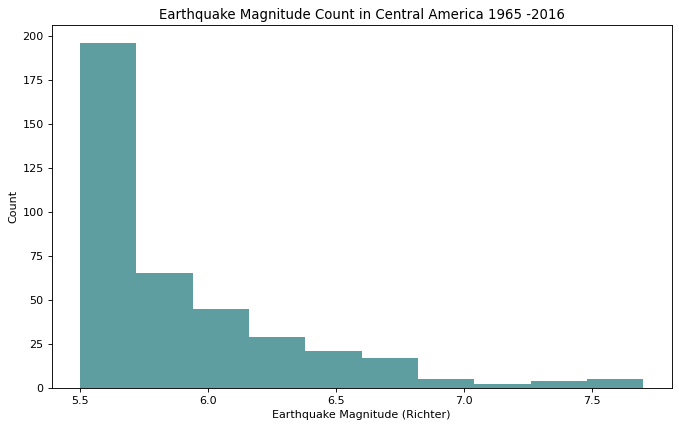

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import cm


figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Earthquake Magnitude Count in Central America 1965 -2016')
plt.xlabel('Earthquake Magnitude (Richter)')
plt.ylabel('Count')

plt.hist(CA_magcount, bins=10, color='cadetblue')

<h3> Top earthquakes in Central America

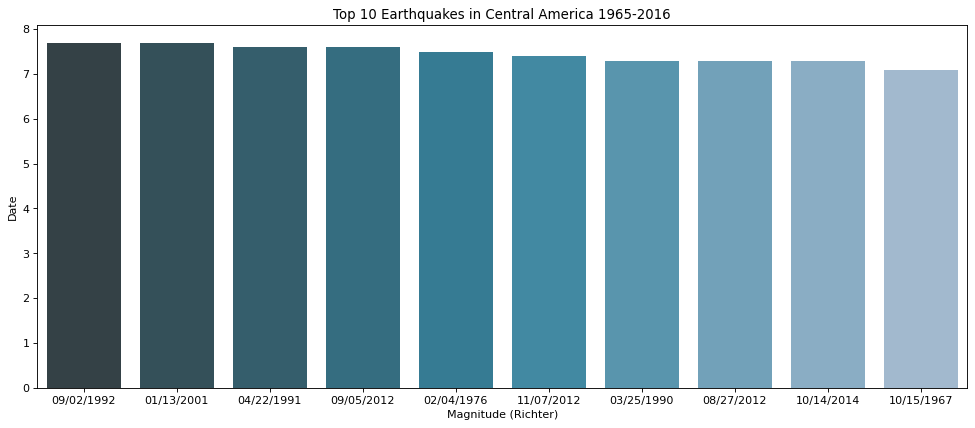

In [34]:
CA_top10 = df_CA1.nlargest(10, 'Magnitude')
y= CA_top10['Magnitude'].values

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Top 10 Earthquakes in Central America 1965-2016')
plt.xlabel('Magnitude (Richter)')
plt.ylabel('Date')

sns.barplot(CA_top10['Date'].values, CA_top10['Magnitude'].values, palette='PuBuGn_d')



In [35]:
df_CA1['year'] = pd.DatetimeIndex(df_CA1['Date']).year


In [36]:
df_CA1.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,year
141,05/03/1965,10:01:38,13.683,-89.070,Earthquake,15.0,5.9,MW,1.022784,ISCGEM856602,ISCGEM,ISCotherEM,other,Automatic,1965
330,12/15/1965,23:05:25,7.650,-81.913,Earthquake,25.0,6.3,MW,1.022784,ISCGEM851774,ISCGEM,ISCotherEM,other,Automatic,1965
398,03/27/1966,18:53:41,8.865,-83.467,Earthquake,25.0,5.7,MW,1.022784,ISCGEM849641,ISCGEM,ISCotherEM,other,Automatic,1966
407,04/09/1966,02:42:09,9.409,-84.282,Earthquake,25.0,5.8,MW,1.022784,ISCGEM848237,ISCGEM,ISCotherEM,other,Automatic,1966
502,08/18/1966,10:33:16,14.478,-91.840,Earthquake,68.4,5.8,MW,1.022784,ISCGEM844633,ISCGEM,ISCotherEM,other,Automatic,1966


<h2> Analysis per Decade

<h3> 1965-1974

In [37]:
CA_60sindex = df_CA1[(df_CA1['year'] >= 1965) & (df_CA1['year'] <= 1974)].index 

CA_60stop = df_CA1.loc[CA_60sindex]

In [38]:
CA_60stop.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,year
141,05/03/1965,10:01:38,13.683,-89.070,Earthquake,15.0,5.9,MW,1.022784,ISCGEM856602,ISCGEM,ISCotherEM,other,Automatic,1965
330,12/15/1965,23:05:25,7.650,-81.913,Earthquake,25.0,6.3,MW,1.022784,ISCGEM851774,ISCGEM,ISCotherEM,other,Automatic,1965
398,03/27/1966,18:53:41,8.865,-83.467,Earthquake,25.0,5.7,MW,1.022784,ISCGEM849641,ISCGEM,ISCotherEM,other,Automatic,1966
407,04/09/1966,02:42:09,9.409,-84.282,Earthquake,25.0,5.8,MW,1.022784,ISCGEM848237,ISCGEM,ISCotherEM,other,Automatic,1966
502,08/18/1966,10:33:16,14.478,-91.840,Earthquake,68.4,5.8,MW,1.022784,ISCGEM844633,ISCGEM,ISCotherEM,other,Automatic,1966


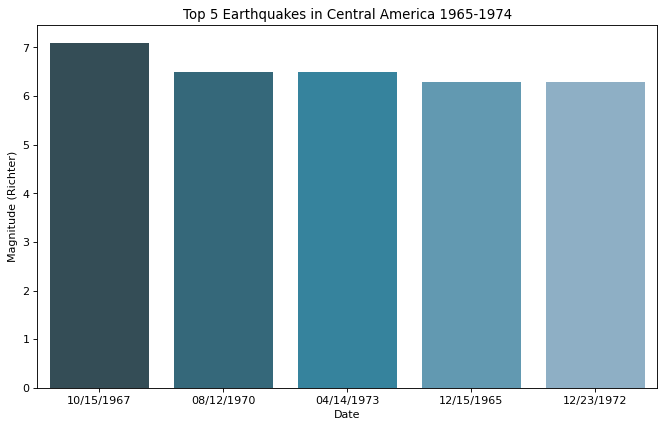

In [39]:
CA_60sindex = df_CA1[(df_CA1['year'] >= 1965) & (df_CA1['year'] <= 1974)].index  #creating list of index of the range of date we need

CA_60stop5 = df_CA1.loc[CA_60sindex].nlargest(5, 'Magnitude') #loc the rows that have the top 5 in magnitude


figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Top 5 Earthquakes in Central America 1965-1974')
plt.xlabel('Date')
plt.ylabel('Magnitude (Richter)')

sns.barplot(x=CA_60stop5['Date'].values, y=CA_60stop5['Magnitude'].values, palette='PuBuGn_d')



<h3> 1975 - 1984

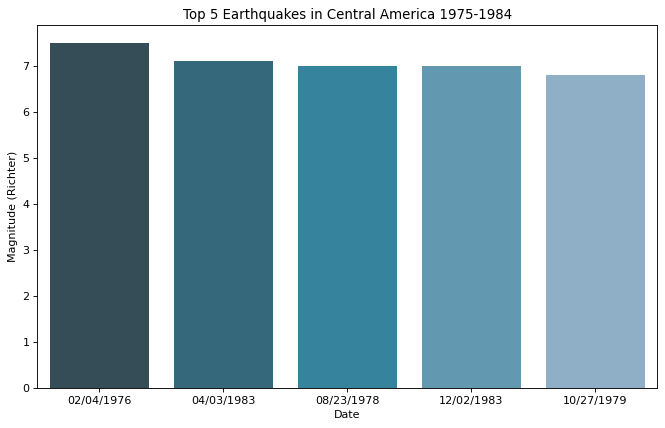

In [40]:
CA_70sindex = df_CA1[(df_CA1['year'] >= 1975) & (df_CA1['year'] <= 1984)].index  #creating list of index of the range of date we need

CA_70stop5 = df_CA1.loc[CA_70sindex].nlargest(5, 'Magnitude') #loc the rows that have the top 5 in magnitude


y70s= CA_70stop5['Magnitude'].values

figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Top 5 Earthquakes in Central America 1975-1984')
plt.xlabel('Date')
plt.ylabel('Magnitude (Richter)')

sns.barplot(CA_70stop5['Date'].values, CA_70stop5['Magnitude'].values, palette='PuBuGn_d')

<h3> 1985 - 1994

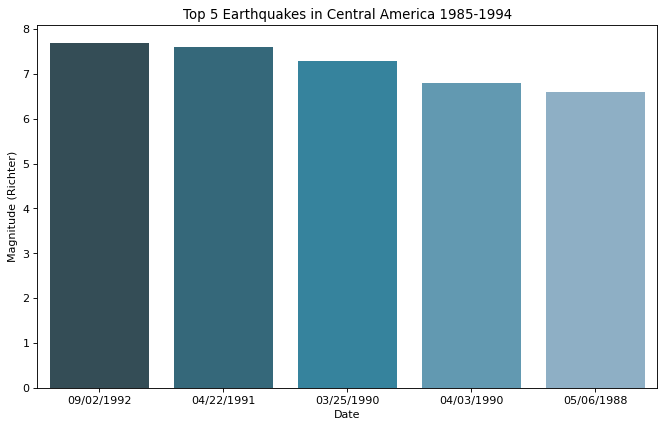

In [41]:
CA_80sindex = df_CA1[(df_CA1['year'] >= 1985) & (df_CA1['year'] <= 1994)].index  #creating list of index of the range of date we need

CA_80stop5 = df_CA1.loc[CA_80sindex].nlargest(5, 'Magnitude') #loc the rows that have the top 5 in magnitude


figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Top 5 Earthquakes in Central America 1985-1994')
plt.xlabel('Date')
plt.ylabel('Magnitude (Richter)')

sns.barplot(CA_80stop5['Date'].values, CA_80stop5['Magnitude'].values, palette='PuBuGn_d')

<h3> 1995 - 2004

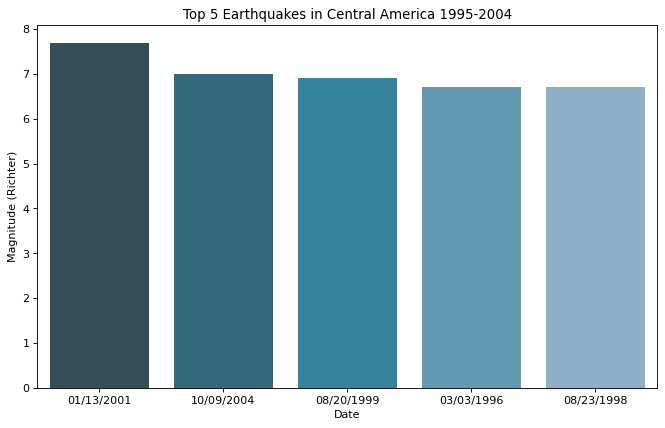

In [42]:
CA_90sindex = df_CA1[(df_CA1['year'] >= 1995) & (df_CA1['year'] <= 2004)].index  #creating list of index of the range of date we need

CA_90stop5 = df_CA1.loc[CA_90sindex].nlargest(5, 'Magnitude') #loc the rows that have the top 5 in magnitude


figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Top 5 Earthquakes in Central America 1995-2004')
plt.xlabel('Date')
plt.ylabel('Magnitude (Richter)')

sns.barplot(CA_90stop5['Date'].values, CA_90stop5['Magnitude'].values, palette='PuBuGn_d')

<h3> 2005 - 2016

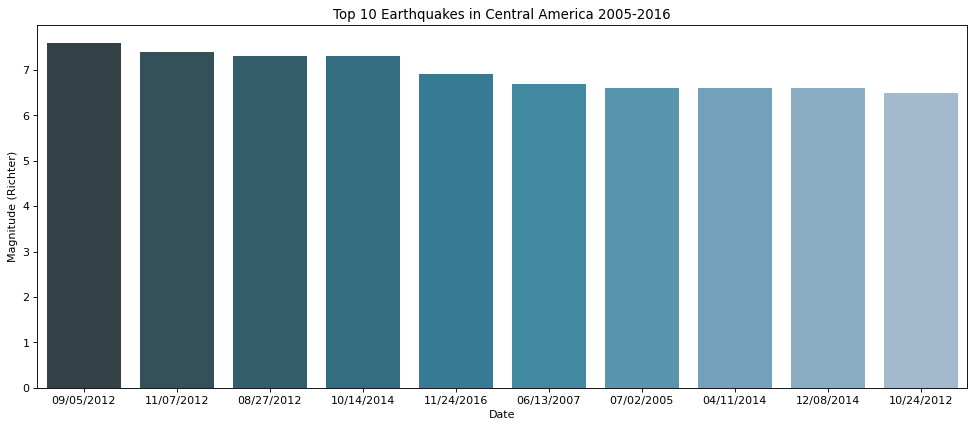

In [43]:
CA_00sindex = df_CA1[(df_CA1['year'] >= 2005) & (df_CA1['year'] <= 2016)].index  #creating list of index of the range of date we need

CA_00stop5 = df_CA1.loc[CA_00sindex].nlargest(10, 'Magnitude') #loc the rows that have the top 10 in magnitude


figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k') 

plt.title('Top 10 Earthquakes in Central America 2005-2016')
plt.xlabel('Date')
plt.ylabel('Magnitude (Richter)')

sns.barplot(CA_00stop5['Date'].values, CA_00stop5['Magnitude'].values, palette='PuBuGn_d')

<h3> Install Folium

In [44]:
!pip install folium

<h3> Plotting all rows on a map, with center in Central America

In [72]:
import folium

locationsCA = df_CA1[['Latitude', 'Longitude']]
locationlistCA = locationsCA.values.tolist()
len(locationlistCA)
locationlist[7]

CAmap = folium.Map(location=[12.27, -85.33], zoom_start=6)
for point in range(0, len(locationlistCA)):
    folium.Marker(locationlistCA[point], popup=df_eq1['Magnitude'][point]).add_to(CAmap)

In [248]:
CAmap

<h2> Analysis by country

<h3> Guatemala

In [126]:
index_names2 = df_CA1[(df_CA1['Latitude'] >= 13.4) & (df_CA1['Latitude'] <= 16) & (df_CA1['Longitude'] <= -90) & (df_CA1['Longitude'] >= -92.5)].index 

df_GUA = df_CA1.loc[index_names2]

In [127]:
df_GUA.shape

(87, 15)

In [132]:
locationsGUA = df_GUA[['Latitude', 'Longitude']]
locationlistGUA = locationsGUA.values.tolist()
len(locationlistGUA)
locationlistGUA[7]

map_GUA = folium.Map(location=[15.4, -90], zoom_start=8)
for point in range(0, len(locationlistGUA)):
    folium.Marker(locationlistGUA[point], popup=df_eq1['Magnitude'][point]).add_to(map_GUA)

In [144]:
map_GUA

<h3> El Salvador

In [360]:
index_names3 = df_CA1[(df_CA1['Latitude'] >= 12.4) & (df_CA1['Latitude'] <= 14) & (df_CA1['Longitude'] <= -88.59) & (df_CA1['Longitude'] >= -90.3)].index 

df_SV = df_CA1.loc[index_names3]

In [361]:
df_SV.shape

(54, 15)

In [362]:
locationsSV = df_SV[['Latitude', 'Longitude']]
locationlistSV = locationsSV.values.tolist()
len(locationlistSV)
locationlistSV[7]

map_SV = folium.Map(location=[13.6, -88.9], zoom_start=8)
for point in range(0, len(locationlistSV)):
    folium.Marker(locationlistSV[point], popup=df_eq1['Magnitude'][point]).add_to(map_SV)

In [363]:
map_SV

<H3> Honduras

In [319]:
index_names4 = df_CA1[(df_CA1['Latitude'] >= 13.1) & (df_CA1['Latitude'] <= 16.40) & (df_CA1['Longitude'] <= -82.9) & (df_CA1['Longitude'] >= -89.3)].index 

df_HON = df_CA1.loc[index_names4]

In [320]:
df_HON.shape

(27, 15)

In [321]:
locationsHON = df_HON[['Latitude', 'Longitude']]
locationlistHON = locationsHON.values.tolist()
len(locationlistHON)
locationlistHON[4]

map_HON = folium.Map(location=[14.6, -87.9], zoom_start=8)
for point in range(0, len(locationlistHON)):
    folium.Marker(locationlistHON[point], popup=df_eq1['Magnitude'][point]).add_to(map_HON)

<h3>Finding correlation between numerical columns

<h4> Filtering numerical columns

In [46]:
numeric_data = df_CA1[['Latitude','Longitude','Depth','Magnitude', 'Root Mean Square']]

<H4> Plotting correlation matrix

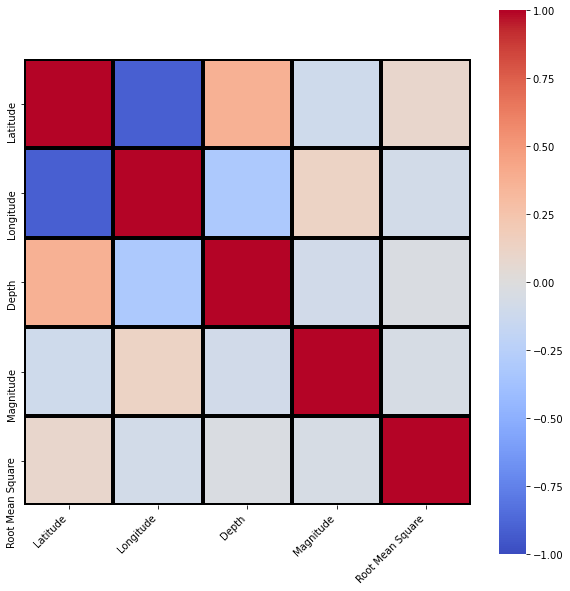

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
corr = numeric_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True,
    linewidths=3,
    linecolor='black'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);